### Ejemplo Regularización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Crea un dataset sintetico 
np.random.seed(0)
X = np.random.rand(100, 3)
# Introducir multicolinealidad haciendo que los features estén correlacionados 
X[:, 1] = X[:, 0] + np.random.normal(0, 0.01, size=(X.shape[0]))
X[:, 2] = X[:, 0] + np.random.normal(0, 0.01, size=(X.shape[0]))
y = 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.normal(0, 0.1, size=(X.shape[0]))

# Crear un DataFrame para visualización
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3'])
df['Target'] = y

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Fit a standard linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Coeficientes sin regularización
print("Coeficientes de la Regresión Lineal:", lin_reg.coef_)

Coeficientes de la Regresión Lineal: [0.67954013 3.97433151 4.35590077]


In [5]:
# Aplicar Regresión de Ridge
ridge_reg = Ridge(alpha=1.0)  # You can adjust alpha to see its effect
ridge_reg.fit(X_train, y_train)

# Coeficientes con regularización
print("Coeficientes de la Regresión Lineal:", ridge_reg.coef_)

Coeficientes de la Regresión Lineal: [2.85700267 2.86087923 2.88031705]


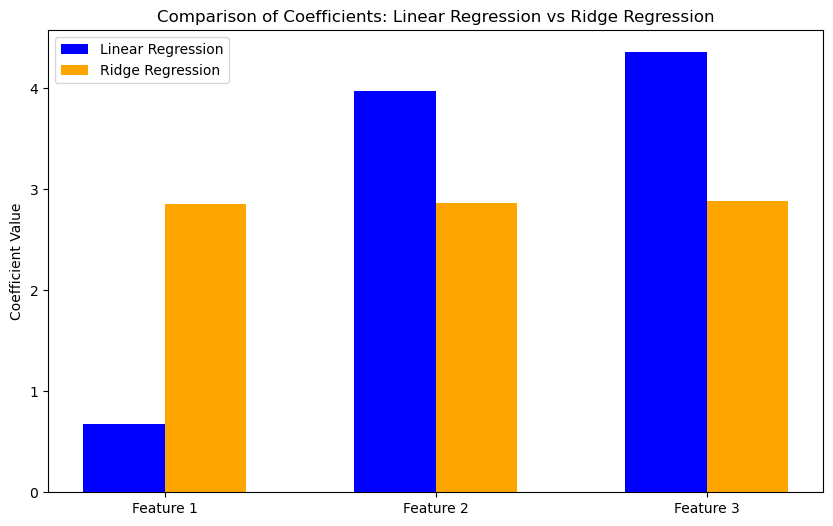

In [7]:
# Plot the coefficients
features = ['Feature 1', 'Feature 2', 'Feature 3']
lin_coefs = lin_reg.coef_
ridge_coefs = ridge_reg.coef_

x = np.arange(len(features))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.15, lin_coefs, width=0.3, label='Linear Regression', color='blue')
plt.bar(x + 0.15, ridge_coefs, width=0.3, label='Ridge Regression', color='orange')
plt.xticks(x, features)
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients: Linear Regression vs Ridge Regression')
plt.legend()
plt.show()

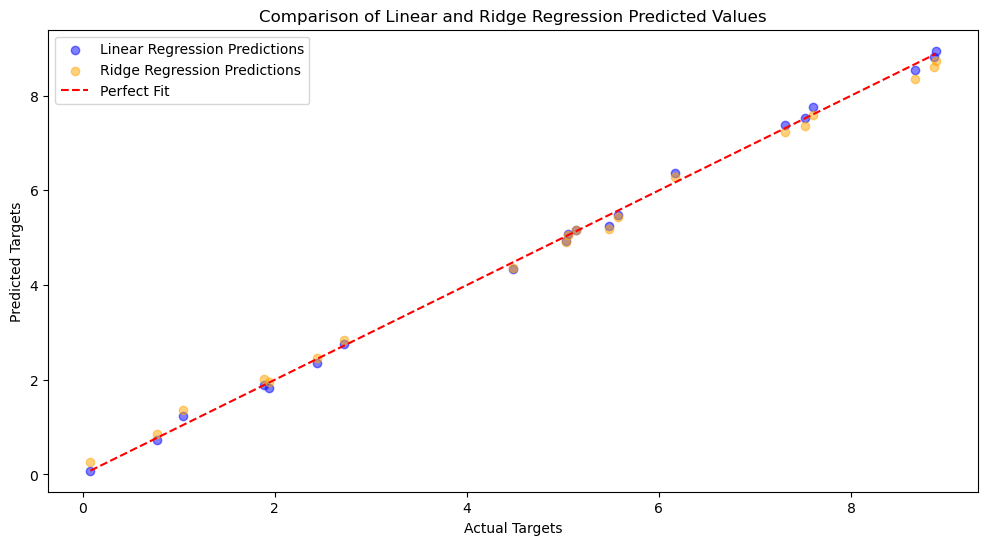

In [9]:
# Predict on the test set
lin_pred = lin_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))

plt.scatter(y_test, lin_pred, color='blue', alpha=0.5, label='Linear Regression Predictions')
plt.scatter(y_test, ridge_pred, color='orange', alpha=0.5, label='Ridge Regression Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Comparison of Linear and Ridge Regression Predicted Values')
plt.legend()
plt.show()

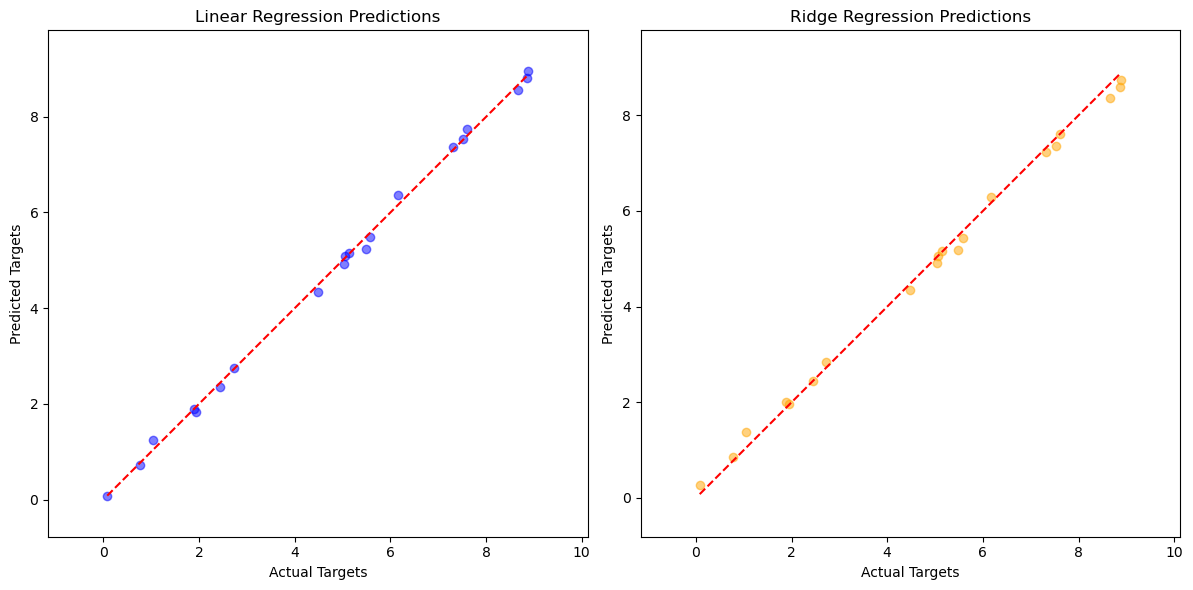

In [11]:
# Predict on the test set
lin_pred = lin_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)

# Plot Linear Regression results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Linear Regression Predictions')
plt.axis('equal')

# Plot Ridge Regression results
plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_pred, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Targets')
plt.title('Ridge Regression Predictions')
plt.axis('equal')

plt.tight_layout()
plt.show()

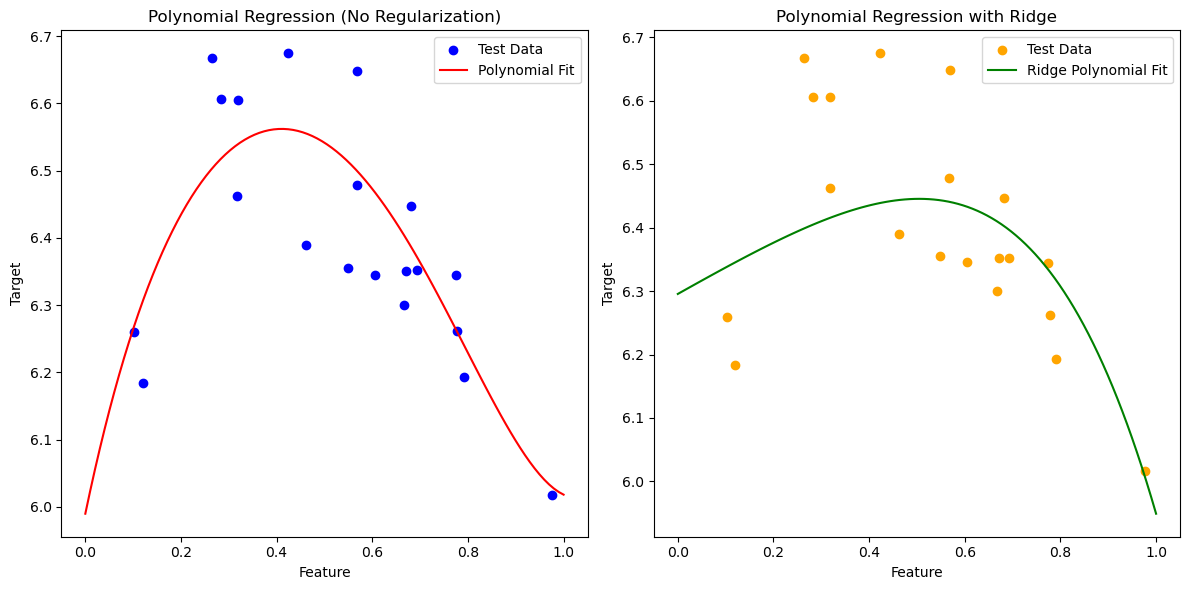

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1)  # Single feature for simplicity
y = (2 * X**3 - 5 * X**2 + 3 * X + 6).flatten() + np.random.normal(0, 0.1, X.shape[0])  # Cubic relationship for more complexity

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features into higher-degree polynomial features (degree=5)
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a standard polynomial regression model (no regularization)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Fit a Ridge regression model (regularization)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_poly, y_train)

# Predict on the test set
lin_pred = lin_reg.predict(X_test_poly)
ridge_pred = ridge_reg.predict(X_test_poly)

# Generate x values for curve plotting
X_curve = np.linspace(0, 1, 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve_lin = lin_reg.predict(X_curve_poly)
y_curve_ridge = ridge_reg.predict(X_curve_poly)

# Plot Polynomial Regression results without regularization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.flatten(), y_test, color='blue', marker='o', label='Test Data')
plt.plot(X_curve, y_curve_lin, color='red', linestyle='-', label='Polynomial Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (No Regularization)')
plt.legend()

# Plot Polynomial Regression results with Ridge regularization
plt.subplot(1, 2, 2)
plt.scatter(X_test.flatten(), y_test, color='orange', marker='o', label='Test Data')
plt.plot(X_curve, y_curve_ridge, color='green', linestyle='-', label='Ridge Polynomial Fit')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression with Ridge')
plt.legend()

plt.tight_layout()
plt.show()